# Energy Consumption Forecasting Project

This project aims to forecast the annual energy consumption for the next 10 years using machine learning models such as XGBoost. 
With limited data points (44 years), careful handling and preprocessing of the dataset are necessary for accurate predictions.

---

## Objectives:
1. Explore the dataset and understand trends in energy consumption.
2. Build and evaluate machine learning models (XGBoost) for time series forecasting.



## Step 1: Import Necessary Libraries

In [3]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

## Step 2: Loading and Cleaning the Dataset

In [4]:

# Load the dataset (update the file path if needed)
file_path = "DATA.xlsx"
data = pd.read_excel(file_path)

# Clean and prepare the data
data = data.rename(columns={"Consumption\\n": "Consumption"})  # Fix column name
data = data.drop(columns=["Unnamed: 0"], errors="ignore")  # Remove unnecessary column

# Convert 'YEARS' to a numerical index for time series analysis
data["YEAR"] = data["YEARS"].str.split('-').str[0].astype(int)
data = data[["YEAR", "Consumption"]]  # Rearrange columns for clarity

# Display the cleaned dataset
print(data.head())


   YEAR  Consumption
0  1979     542254.0
1  1980     589017.0
2  1981     644907.0
3  1982     690214.0
4  1983     754725.0


## Step 3: Exploratory Data Analysis (EDA)

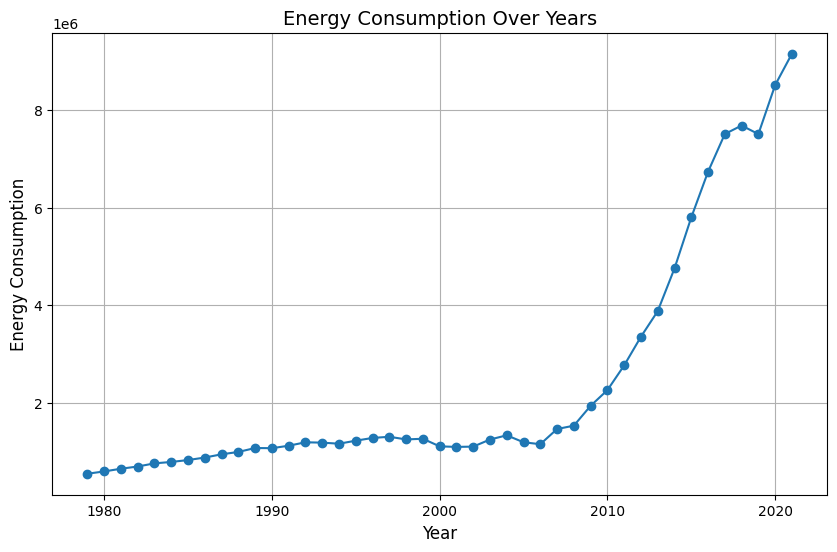

In [5]:
import matplotlib.pyplot as plt

# Plot the data to visualize energy consumption trends
plt.figure(figsize=(10, 6))
plt.plot(data["YEAR"], data["Consumption"], marker='o')
plt.title("Energy Consumption Over Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Energy Consumption", fontsize=12)
plt.grid(True)
plt.show()


## Step 4: Model Building with XGBoost

In [6]:


# Prepare the data for modeling
X = data["YEAR"].values.reshape(-1, 1)  # Features
y = data["Consumption"].values  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model with early stopping
model = XGBRegressor(objective="reg:squarederror", n_estimators=1000, early_stopping_rounds=10)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 475900.09027777775
